# Inferential Statistics



## Problem Statement

`Bank Of New York` wants to expand its branches and for that it has certain hypothesis and statements it wants to verify. Using the inferential statistics method you just learned, help the bank.


## About the Dataset

The snapshot of the data you will be working on:

![dtdataset](../images/is_dataset.PNG)


It has data of 9578 customers with the following 15 features:

|Feature|Description|
|-----|-----|
|customer.id|ID of the customer|
|credit.policy|If the customer meets the credit underwriting criteria of LendingClub.com or not|
|purpose|The purpose of the loan(takes values :"credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").|
|int.rate|The interest rate of the loan|
|installment|The monthly installments owed by the borrower if the loan is funded|
|log.annual.inc|The natural log of the self-reported annual income of the borrower|
|dti|The debt-to-income ratio of the borrower (amount of debt divided by annual income)|
|fico|The FICO credit score of the borrower|
|days.with.cr.line|The number of days the borrower has had a credit line.|
|revol.bal|The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)|
|revol.util|The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)|
|pub.rec| The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
|inq.last.6mths| The borrower's number of inquiries by creditors in the last 6 months|
|delinq.2yrs| The number of times the borrower had been 30+ days past due on a payment in the past 2 years|
|paid.back.loan|Whether the user has paid back loan|


## Why solve this project ?

After completing this project, you will have a better understanding of how to use inferential statistics. In this project, you will apply the following concepts:

* Confidence Interval

* Central Limit Theorem

* Hypothesis Testing

* Chi Square Test


# Confidence Interval

Our first task will involve loading data and finding the confidence interval.

* Load the dataset from `'path'`(given) and store it in a variable called `'data'`. 


* Create a sample of `'data'` using `"sample()"` with `n=sample_size` and `random_state=0` and save it in a variable called `'data_sample'`


* Store the mean of `installment` column of `'sample_data'` in a variable called `'sample_mean'` 


* Store the standard deviation of `installment` column of `'sample_data'` in a variable called `'sample_std'`


* Find the margin of error using `'z_critical'`(given),`'sample_std'` and `'sample_size'` and save it in a variable called `'margin_of_error'`


* Find the confindence interval using `'sample_mean'` and `'margin_of_error'` and save it in a variable called `'confidence_interval'`.


* Store the mean of `installment` column of `'data'` in a variable called `'true_mean'` 


* Print and check if `'true_mean'` falls in the range of `'confidence_interval'`

# Hints

Formula for `margin_of_error` is :

`"z_critical * (sample_std/math.sqrt(sample_size))"`

Formula for `confidence_interval` is:

`"(sample_mean - margin_of_error,
   sample_mean + margin_of_error)"`

# Test Cases

#data

Variable declaration check

type(data)==pd.core.frame.DataFrame

data.shape==(9578, 15)

data.iloc[7,7]==722


#data_sample

Variable Declaration

type(data_sample)==pd.core.frame.DataFrame

data_sample.shape==(2000, 15)

data_sample.iloc[7,7]==737

#sample_mean

Variable declaration check

round(sample_mean,2)==round(317.610965,2)

#sample_std

Variable declaration check

round(sample_std,2)==round(207.64991593475935,2)

#margin_of_error

Variable declaration check

round(margin_of_error,2)==round(7.637373299879684,2)

#confidence_interval

Variable declaration check

round(confidence_interval[0],2)==round(309.9735917001203,2)

round(confidence_interval[1],2)==round(325.2483382998797,2)


#true_mean

Variable declaration check

round(true_mean,2)==round(319.08941323867197,2)

In [36]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import warnings

warnings.filterwarnings('ignore')
#Sample_Size
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  

#Path
path='../data/cleaned_loan_data.csv'

#Code starts here

#Reading file
data=pd.read_csv(path)

#Sampling the dataframe
data_sample = data.sample(n=sample_size, random_state=0)


#Finding the mean of the sample
sample_mean = data_sample['installment'].mean()

#Finding the standard deviation of the sample
sample_std = data_sample['installment'].std()

#Finding the margin of error
margin_of_error = z_critical * (sample_std/math.sqrt(sample_size))

#Finding the confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

#Finding the true mean
true_mean=data['installment'].mean()

print(("True mean: {}".format(true_mean)))

#Code ends here
round(319.08941323867197,2)

Confidence interval:
(309.9735917001203, 325.2483382998797)
True mean: 319.08941323867197


319.09

# Success Message

Congrats! You have successfully loaded the data and found the confidence interval

# CLT 

Let's now find out if Central Limit Theorem holds for `installment` column

* An array of sample sizes to take(`'sample_size'`) is given 
 
 
* Create subplot with `(nrows = 3 , ncols = 1)` and store it in variable's `fig ,axes`


* Create `i` loop with range `(len(sample_size))`. 


* Inside the `i` loop, initialise a list `'m'` and  create `j` loop with range `(1000)`(for no. of samples=`1000')


* Inside the `j` loop create a dataset sample of `data` with `sample_size`==`sample_size[i]` using `"sample()"`, find the mean of `installment` column of that sample and append it to list `'m'`


* Outside the `j` loop(but still inside the `i` loop), convert `'m'` into a series called `'mean_series'`


* Then, using axes[i], plot the corresponding histogram for `mean_series`



### Things to ponder upon:

         * Does the central limit theory hold for the `installment` column?

# Hints

You can create series of mean values of sample sizes by writing code similar to:

``` python
for j in range(1000):
        
        mean=data['installment'].sample(sample_size[i]).mean()
        m.append(mean)

    mean_series=pd.Series(m)   
```


# Test Cases

#mean_series

Variable Declaration

np.round(mean_series[10],2)==np.round(324.77,2)

307.64


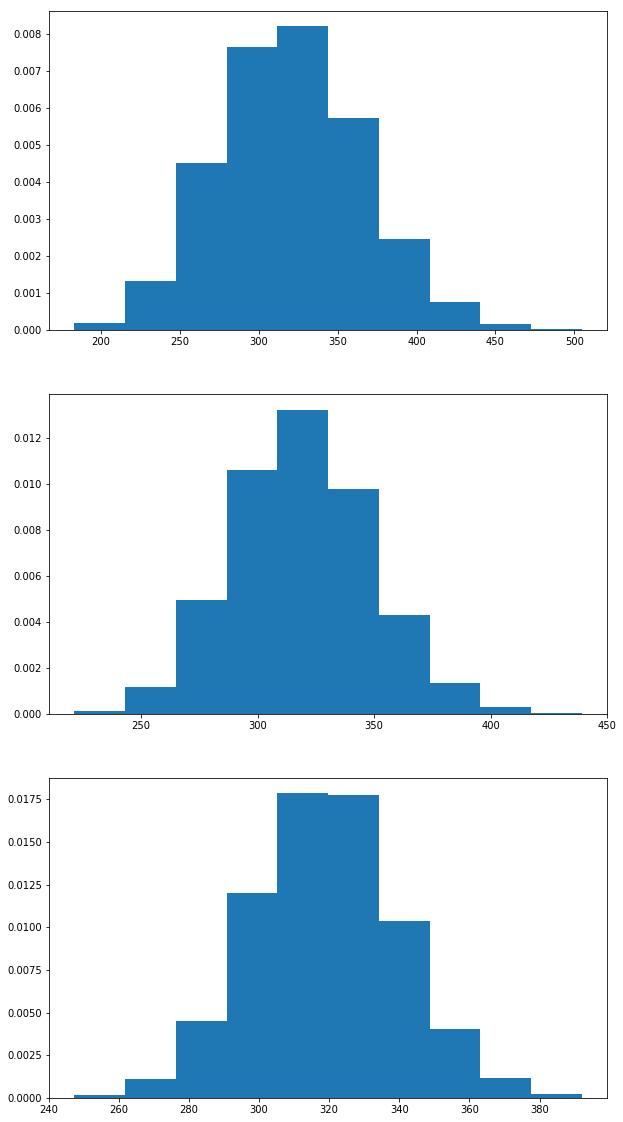

In [19]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#Different sample sizes to take
sample_size=np.array([20,50,100])

#Code starts here



#Creating different subplots
fig,axes=plt.subplots(3,1, figsize=(10,20))

#Running loop to iterate through rows
for i in range(len(sample_size)):
    
    #Initialising a list
    m=[]
    
    #Loop to implement the no. of samples
    for j in range(5000):
        
        #Finding mean of a random sample
        mean=data['installment'].sample(sample_size[i]).mean()
        
        #Appending the mean to the list
        m.append(mean)
        
        
    #Converting the list to series
    mean_series=pd.Series(m)   

    #Plotting the histogram for the series
    axes[i].hist(mean_series, normed=True)

    

#Displaying the plot
plt.show()


#Code ends here

# Success Message

Congrats! You have successfully plotted the the mean sample for different sample sizes.

# Small Business Interests

The bank manager believes that people with `purpose` as `'small_business'`  have been given `int.rate` more due to the risk assosciated

Let's do a hypothesis testing(one-sided) on that belief

***

Null Hypothesis $H_0: \mu = $  `12 %` 

**Meaning**: There is no difference in interest rate being given to people with purpose as 'small_business' 

Alternate Hypothesis $H_1: \mu > $ `12 %`

**Meaning**: Interest rate being given to people with purpose as 'small_business' is higher than the average interest rate

***
* From the column `int.rate` of `'data'`, remove the `%` character and convert the column into float.


* After that divide the values of `int.rate` with 100 and store the result back to the column `'int.rate'`


* Apply `"ztest()"` with `x1` as `data[data['purpose']=='small_business']['int.rate']` and `value` as `data['int.rate'].mean()`, `alternative`=`'larger'`(**WHY?**) and save the results in `'z_statistic'` and `'p_value'` respectively


* If `'p-value` is less than 0.05, you can reject the null hypothesis,
  If `'p-value` is greater than 0.05, you can't reject the null hypothesis,

# Hints

You can drop `%` from `int.rate` from `'X_train'` by writing code similar to:

`X_train['int.rate'].map(lambda x: str(x)[:-1])`


You can divide `int.rate` by 100 by writing code similar to:

`X_train['int.rate'].astype(float)/100`


# Test Case

#X_train['int.rate']

np.round(data['int.rate'][100],4)==np.round(0.0712,4)

np.round(data['int.rate'][50],4)==np.round(0.0743,4)

np.all(num_df.columns.values==['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec'])

#z_statistic

Variable declaration check

round(z_statistic,2)==round(12.321276240200591,2)

#p_value

Variable declaration check

round(p_value,35)==round(3.4792131906806856e-35,35)

In [47]:
#Importing header files

from statsmodels.stats.weightstats import ztest

#Code starts here

# Removing the last character from the values in column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

# Dividing the column values by 100
data['int.rate']=data['int.rate'].astype(float)/100


#Applying ztest for the hypothesis
z_statistic, p_value = ztest(x1=data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

print(('Z-statistic is :{}'.format(z_statistic)))
print(('P-value is :{}'.format(p_value)))

#Code ends here

Z-statistic is :12.321276240200591
P-value is :3.4792131906806856e-35


# Success Message

Congrats! You have successfully implemented one sided hypothesis test

# Installment vs Loan Defaulting

The bank thinks that monthly installments (`installment`) customers have to pay might have some sort of effect on loan defaulters 

Let's do hypothesis testing(two-sided) on that

***

Null Hypothesis $H_0: \mu $(yes) == $\mu$(no)  

**Meaning**: There is no difference in installments being paid by loan defaulters and loan non defaulters

Alternate Hypothesis $H_1: \mu $(yes) $ \neq \mu$(no)  

**Meaning**: There is difference in installments being paid by loan defaulters and loan non defaulters

***

* Apply `"ztest()"` with `x1` as `data[data['paid.back.loan']=='Yes']['installment']` and `x2` as `data[data['paid.back.loan']=='Yes']['installment']` and save the results in `'z_statistic'` and `'p_value'` respectively


* If `'p-value` is less than 0.05, you can reject the null hypothesis,
  If `'p-value` is greater than 0.05, you can't reject the null hypothesis,  


# Hints

Application of your ztest will look similar to:

```python
ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

```

# Test Cases

#z_statistic

Variable declaration check
round(z_statistic,2)==round(4.894575287952092,2)


#p_value

Variable declaration check
round(p_value,7)==round(9.85182562491764e-07,7)

In [49]:
#Importing header files
from statsmodels.stats.weightstats import ztest

#Code starts here

#Applying ztest for the hypothesis
z_statistic, p_value = ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic is :{}'.format(z_statistic)))
print(('P-value is :{}'.format(p_value)))

#Code ends here
round(9.85182562491764e-07,7)

Z-statistic is :4.894575287952092
P-value is :9.85182562491764e-07


1e-06

# Success Message

Congrats! You have successfully implemented two sided hypothesis test

# Purpose vs Loan Defaulting

Another thing bank suspects is that there is a strong assosciation between purpose of the loan(`purpose` column) of a person and whether that person has paid back loan (`paid.back.loan` column)

Since both are categorical columns, we will do chi-square test to test the same.

***
Null Hypothesis : Distribution of purpose across all customers is same.

Alternative Hypothesis : Distribution of purpose for loan defaulters and non defaulters is different.

***
* Create a variable `'yes'` which is the value counts of `purpose` when `paid.back.loan` in `'data'` is `Yes`


* Create a variable `'no'` which is the value counts of `purpose` when `paid.back.loan` in `'data'` is `No`


* Concat `'yes.transpose()'`(transpose of `'yes'`) and `'no.transpose()'`(transpose of `'no'`) along `axis`=`1` with `keys`= `['Yes','No']` and store it in a variable called `'observed'`


* Apply `"chi2_contingency()"` on `'observed'` and store the result in variables named `chi2, p, dof, ex` respectively.

* Compare `chi2` with `critical_value`(given)

* If chi-squared statistic exceeds the critical value, reject the null hypothesis that the two distributions are the same, else null hypothesis cannot be rejected

# Hints
You can concat `'yes'` and `'no'` by writing code similar to :

```python

pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])

```

# Test Case

#observed

Variable declaration check

observed['Yes'][0]==1944
observed['No'][0]==387

#chi2
Variable declaration check
(round(chi2,2)==round(96.98469589063261,2)

#p
Variable declaration check
round(p,18)==round(1.0672453117980422e-18,18)

#dof
Variable declaration check
(dof==6)

#ex
Variable declaration check
round(ex[0,1],2)==round(373.0865525161829,2)
round(ex[2,0],2)==round(3323.6651701816663,2)

In [55]:
#Importing header files
from scipy.stats import chi2_contingency

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1

#Code starts here


# Subsetting the dataframe
yes=data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no=data[data['paid.back.loan']=='No']['purpose'].value_counts()


#Concating yes and no into a single dataframe
observed=pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])

chi2, p, dof, ex = chi2_contingency(observed)


print("Critical value")
print(critical_value)


print("Chi Statistic")
print(chi2)

#Code ends here


Critical value
12.591587243743977
Chi Statistic
96.98469589063261


3323.67

# Success Message

Congrats! You have successfully applied chi square test on two categorical columns
